<a href="https://colab.research.google.com/github/mjmousavi97/Deep-Learning-Tehran-uni/blob/main/HomeWorks/01%20HW/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
import os
from google.colab import drive
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


## Data Definition and Scatter Plot

In this section, we generate two sets of two-dimensional data points *(x, y)*.  
Both variables **x** and **y** are drawn from normal (Gaussian) distributions with different means and standard deviations for each set.

### Data Specifications

- **First set**: contains 100 data points  
  - $x \sim \mathcal{N}(0, 0.1^2)$  
  - $y \sim \mathcal{N}(0, 0.4^2)$

- **Second set**: contains 100 data points  
  - $x \sim \mathcal{N}(1, 0.2^2)$  
  - $y \sim \mathcal{N}(1, 0.2^2)$

### Objective
- Generate these two data sets using the specified normal distributions.
- Plot their scatter plot on the same figure, using different colors to distinguish the two sets.


In [2]:
# Mean and std of class 1
mu_x1, sigma_x1 = 0, 0.1 # mean and standard deviation
mu_y1, sigma_y1 = 0, 0.4 # mean and standard deviation

# Generate class 1 data
x1 = np.random.normal(mu_x1, sigma_x1, 100)
y1 = np.random.normal(mu_y1, sigma_y1, 100)
s1 = np.column_stack((x1, y1))

# Class 1's labels
y1 = np.ones(100) - 2

In [3]:
# Mean and std of class 2
mu_x2, sigma_x2 = 1, 0.2 # mean and standard deviation
mu_y2, sigma_y2 = 1, 0.2 # mean and standard deviation

# Generate class 2 data
x2 = np.random.normal(mu_x2, sigma_x2, 100)
y2 = np.random.normal(mu_y2, sigma_y2, 100)
s2 = np.column_stack((x2, y2))

# Class 2's labels
y2 = np.ones(100)

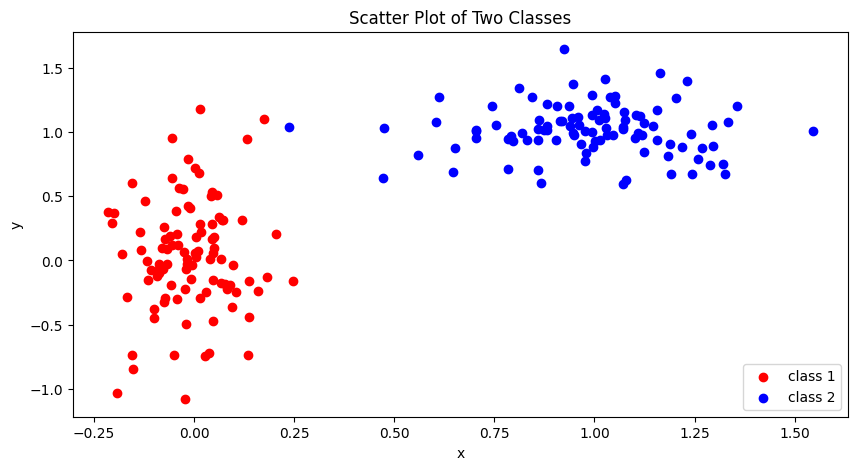

In [4]:
# Plot class 1 and class 2 data
plt.figure(figsize=(10,5))
plt.scatter(s1[:, 0], s1[:, 1], color='red', label='Class 1')
plt.scatter(s2[:, 0], s2[:, 1], color='blue', label='Class 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of Two Classes')
plt.legend(['class 1', 'class 2'], loc='lower right')
plt.show()



# Gradient Descent Methods in Adaline

## 🚀 1. Batch Gradient Descent

### How it works
- In each **epoch**, the algorithm:
  1. Computes the net input (`net = X · w + w0`) for **all training samples at once**.
  2. Calculates the errors for all samples (`errors = y - net`).
  3. Updates the weights **once per epoch**, using the aggregated information from all samples:
     ```
     w  = w + η * Xᵀ · errors
     w0 = w0 + η * sum(errors)
     ```
  4. Computes the total cost (sum of squared errors) over all samples.

### Characteristics
✅ Smooth convergence, less noisy.  
🚫 Can be slow on large datasets since it processes **all samples together** before making any weight updates.

---

## ⚡ 2. Stochastic Gradient Descent (SGD)

### How it works
- In each **epoch**, the algorithm:
  1. Loops through **each individual sample** `(xi, yi)` in the training set (often shuffled).
  2. For each sample:
     - Computes the net input: `net = xi · w + w0`
     - Calculates the error: `error = yi - net`
     - **Immediately updates** the weights based on this single sample:
       ```
       w  = w + η * xi * error
       w0 = w0 + η * error
       ```
  3. Optionally computes the average cost over the epoch.

### Characteristics
✅ Faster for very large datasets, can escape local minima due to its inherent noise.  
🚫 Convergence path is more erratic (zig-zag).

---

## 🚀 Summary of the differences

|                 | Batch Gradient Descent      | Stochastic Gradient Descent (SGD) |
|-----------------|----------------------------|-----------------------------------|
| **Updates per epoch** | Once, after all samples processed | Once per sample |
| **Speed on large data** | Slower                   | Faster |
| **Convergence** | Smoother, stable           | Noisy, fluctuates |
| **Memory usage** | Loads all data together   | Only needs one sample at a time |

---


# 📚 Derivation of the Update Rule for Adaline in Batch and Stochastic Gradient Descent

---

## ⚡ 1. The Adaline model

For a single sample $i$:

$$
net_i = w_0 + \mathbf{x}_i^\top \mathbf{w}
= w_0 + \sum_{j=1}^d w_j x_{ij}
$$

where:
- $\mathbf{x}_i$ is the feature vector for sample $i$.
- $\mathbf{w}$ is the weight vector (excluding bias).
- $w_0$ is the bias.

---

## 🎯 2. The cost function (SSE)

Adaline minimizes the **Sum of Squared Errors (SSE)**:

$$
J(\mathbf{w}) = \frac{1}{2} \sum_{i=1}^n (t_i - net_i)^2
$$

where the $\frac12$ simplifies derivatives.

---

## ✍️ 3. Computing gradients for weight update

### 🚀 Gradient w.r.t. weights $w_j$

$$
\frac{\partial J}{\partial w_j}
= \frac12 \sum_{i=1}^n 2 (t_i - net_i)(-1) x_{ij}
= -\sum_{i=1}^n (t_i - net_i) x_{ij}
$$

---

### 🚀 Gradient w.r.t. bias $w_0$

$$
\frac{\partial J}{\partial w_0}
= -\sum_{i=1}^n (t_i - net_i)
$$

---

# 🧮 4. The update rules

---

## ✅ Batch Gradient Descent (BGD)

In **BGD**, we compute gradients over all samples before updating:

$$
w_j := w_j - \eta \frac{\partial J}{\partial w_j}
= w_j + \eta \sum_{i=1}^n (t_i - net_i) x_{ij}
$$

For bias:

$$
w_0 := w_0 + \eta \sum_{i=1}^n (t_i - net_i)
$$

---

### ✍️ Vectorized form

Using:

- $\mathbf{X}$ as the data matrix $(n \times d)$,
- $\mathbf{t}$ as the target vector,
- $\mathbf{net} = \mathbf{X}\mathbf{w} + w_0$,

the updates become:

$$
\mathbf{w} := \mathbf{w} + \eta \mathbf{X}^\top (\mathbf{t} - \mathbf{net})
$$

$$
w_0 := w_0 + \eta \sum_{i=1}^n (t_i - net_i)
$$

---

## ✅ Stochastic Gradient Descent (SGD)

In **SGD**, we update after processing each individual sample.

---

### 🚀 Cost and gradient for a single sample

Cost for sample $i$:

$$
J_i(\mathbf{w}) = \frac12 (t_i - net_i)^2
$$

Gradients:

$$
\frac{\partial J_i}{\partial w_j} = - (t_i - net_i) x_{ij}
$$

$$
\frac{\partial J_i}{\partial w_0} = - (t_i - net_i)
$$

---

### ✍️ Update rule for SGD

So for sample $i$:

$$
w_j := w_j + \eta (t_i - net_i) x_{ij}
$$

$$
w_0 := w_0 + \eta (t_i - net_i)
$$

or compactly:

$$
\mathbf{w} := \mathbf{w} + \eta \, error_i \, \mathbf{x}_i
$$

$$
w_0 := w_0 + \eta \, error_i
$$

where

$$
error_i = t_i - net_i
$$

---

## 🌸 Summary table

| Method      | Gradient computation               | Weight update frequency   |
|-------------|------------------------------------|---------------------------|
| **BGD**     | Over **all samples** (batch)       | Once per epoch            |
| **SGD**     | Per **single sample**             | After **every sample**     |


In [6]:
class Adaline:
    def __init__(self, learning_rate=0.01, n_epoch=50):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.weights = None
        self.cost = []

    def fit(self, X, y):
        n_samples, n_features = X.shape[0], X.shape[1]

        # Initialize weights (including bias)
        self.weights = np.zeros(n_features + 1)

        for i in range(self.n_epoch):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output

            # Update weights
            self.weights[1:] += self.learning_rate * X.T.dot(errors)
            self.weights[0] += self.learning_rate * errors.sum()

            # Cost function (SSE)
            cost = (errors**2).sum() / 2.0
            self.cost.append(cost)

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def activation(self, Z):
        return Z

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    """
    Plot decision boundary for a classifier with 2D features.

    Parameters
    ----------
    X : ndarray, shape = [n_samples, 2]
        Feature matrix (must be 2 features for visualization).
    y : ndarray, shape = [n_samples]
        Class labels.
    classifier : fitted classifier with .predict()
    resolution : float
        Step size for meshgrid.
    """
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightgray')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # flatten then predict then reshape back
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # plot the contour
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)],
                    marker=markers[idx], label=f'Class {cl}')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

In [10]:
# Concatenate class 1 and class 2 inputs
X = np.concatenate((s1, s2), axis=0)

# Concatenate class 1 and class 2 outputs
y = np.concatenate((y1, y2), axis=0)

# X: (200, 2)
# y: (200,)

indices = np.arange(X.shape[0])
np.random.shuffle(indices)

X_shuffled = X[indices]
y_shuffled = y[indices]


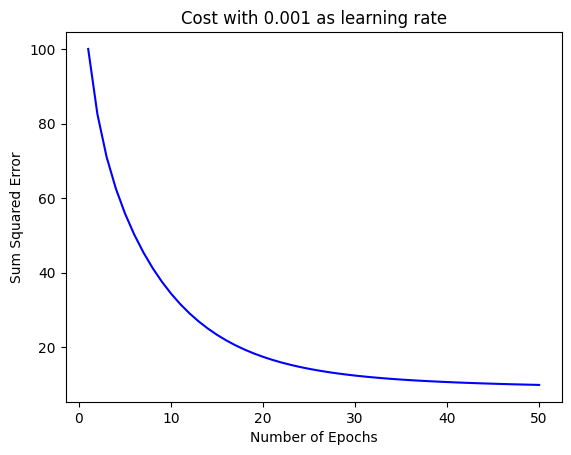

In [11]:
# Define adaline
adaline = Adaline(learning_rate=0.001, n_epoch=50)

adaline.fit(X=X_shuffled, y=y_shuffled)

# Plot cost of adaline model
plt.plot(range(1, len(adaline.cost) + 1), adaline.cost, color='blue')
plt.xlabel('Number of Epochs')
plt.ylabel('Sum Squared Error')
plt.title(f'Cost with 0.001 as learning rate')
plt.show()

In [12]:
# Print adaline model weights
pd.DataFrame(data=adaline.weights)

,0
0,-0.858268
1,1.099277
2,0.640350


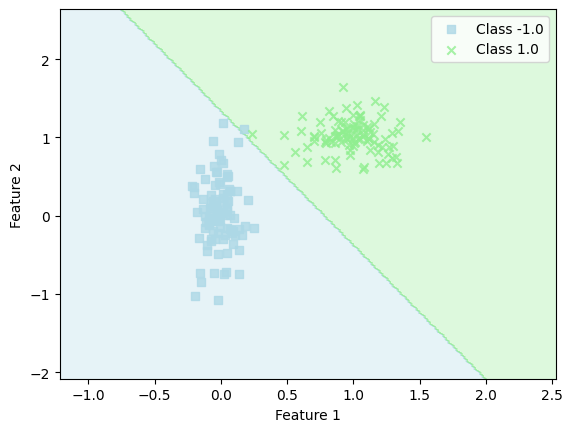

In [13]:
plot_decision_regions(X_shuffled, y_shuffled, classifier=adaline)

### ⚠️ Observations on the Decision Boundary

- While the classifier draws a clean linear boundary between the two classes,
- There appears to be **one or two samples from Class -1.0 (light blue)** that are positioned very close to or on the other side of the boundary.
- This might indicate:
  - Slight label noise in the data,
  - Or natural overlap in feature space,
  - Or simply a trade-off from minimizing the overall error (SSE) without forcing a perfect separation.

---

### ✅ Final Remark

- The model still performs well overall, with **almost all samples correctly classified**.
- A small number of ambiguous or mislabeled samples is common in practical datasets.